In [1]:
%config Completer.use_jedi=False
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from io import BytesIO

In [4]:
import base64
import requests
import torch
import os
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils as vutils
from network.Transformer import Transformer

from tqdm import tqdm_notebook
from test_from_code import transform

In [5]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]

models = {}

for style in tqdm_notebook(styles):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join("../pretrained_model/", style + '_net_G_float.pth')))
    model.eval()
    models[style] = model

/Users/ahmedbesbes/anaconda3/envs/cv/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [6]:
path = "/Users/ahmedbesbes/Downloads/djoko.jpg"

In [7]:
%%time
output300 = transform(models, "Hosoda", path, load_size=300)

inference time took 2.103131055831909 s
CPU times: user 1.85 s, sys: 182 ms, total: 2.04 s
Wall time: 2.2 s


/Users/ahmedbesbes/anaconda3/envs/cv/lib/python3.6/site-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


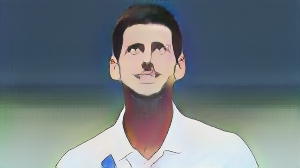

In [8]:
output300

In [9]:
%%time
output450 = transform(models, "Hosoda", path, load_size=450)

inference time took 4.388765335083008 s
CPU times: user 3.77 s, sys: 436 ms, total: 4.2 s
Wall time: 4.45 s


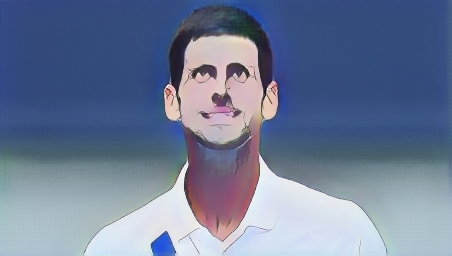

In [10]:
output450

In [11]:
%%time
output450 = transform(models, "Hosoda", path, load_size=650)

inference time took 11.900673151016235 s
CPU times: user 8.14 s, sys: 1.03 s, total: 9.17 s
Wall time: 12 s


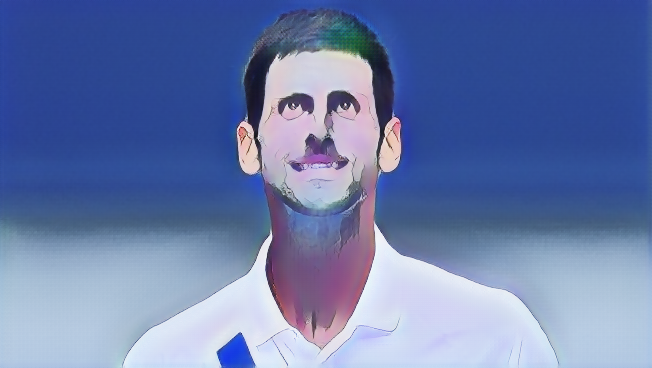

In [12]:
output450

### Use the deployed API

In [ ]:
path = '/Users/ahmedbesbes/Downloads/djoko.jpg'

with open(path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

url = "https://tbuxfdm545.execute-api.eu-west-3.amazonaws.com/dev/transform"

data = {
    "image": encoded_string,
    "model_id": 1,
    "load_size": 800
}

In [ ]:
%%time
response = requests.post(url, json=data)

In [ ]:
response.content

In [ ]:
image = response.json()["output"]

image = image[image.find(",")+1:]
dec = base64.b64decode(image + "===")

image = Image.open(BytesIO(dec))

In [ ]:
image